# NYC Flights Data Clean & Analysis

Newyork air flights in the year 2013 are available at the R package newyork13. the data is segregated as a relational database with keys that you can connect the datasets with. the description of the columns in the data is in the case study description document. we can answer some very interesting questions using these datasets.

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# ignore the warning
from warnings import filterwarnings
filterwarnings("ignore")

In [8]:
# Load the data
airlines_data = pd.read_csv("/Users/steveyuan/Documents/GitHub/Python_100Days/Day7_Market_Data_Clean/airlines.csv", encoding="utf-8")
airports_data = pd.read_csv("/Users/steveyuan/Documents/GitHub/Python_100Days/Day7_Market_Data_Clean/airports.csv", encoding="utf-8")
flights_data = pd.read_csv("/Users/steveyuan/Documents/GitHub/Python_100Days/Day7_Market_Data_Clean/flights.csv", encoding="utf-8")
plane_data = pd.read_csv("/Users/steveyuan/Documents/GitHub/Python_100Days/Day7_Market_Data_Clean/planes.csv", encoding="utf-8")
#display
# airlines_data
airports_data
# flights_data
# plane_data

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
...,...,...,...,...,...,...,...,...
1453,ZUN,Black Rock,35.083228,-108.791778,6454,-7,A,America/Denver
1454,ZVE,New Haven Rail Station,41.298669,-72.925992,7,-5,A,America/New_York
1455,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0,-5,A,America/New_York
1456,ZWU,Washington Union Station,38.897460,-77.006430,76,-5,A,America/New_York


## 1.what is the most popular destination city from NewYork?

In [9]:
flights_data.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

In [13]:
# Group by 
dest_cnt = flights_data.groupby("dest").size().reset_index(name="cnt").sort_values(by="cnt", ascending=False)

# Display
dest_cnt

,dest,cnt
69,ORD,17283
4,ATL,17215
49,LAX,16174
11,BOS,15508
54,MCO,14082
...,...,...
63,MTJ,15
87,SBN,10
3,ANC,8
51,LGA,1


In [21]:
# join this table with airports data
dest_cnt_df = pd.merge(dest_cnt, airports_data, how="left", left_on="dest", right_on="faa")

dest_cnt_df.sort_values(by="cnt", ascending=True)

,dest,cnt,faa,name,lat,lon,alt,tz,dst,tzone
104,LEX,1,LEX,Blue Grass,38.036500,-84.605889,979.0,-5.0,A,America/New_York
103,LGA,1,LGA,La Guardia,40.777245,-73.872608,22.0,-5.0,A,America/New_York
102,ANC,8,ANC,Ted Stevens Anchorage Intl,61.174361,-149.996361,152.0,-9.0,A,America/Anchorage
101,SBN,10,SBN,South Bend Rgnl,41.708661,-86.317250,799.0,-5.0,A,America/New_York
99,HDN,15,HDN,Yampa Valley,40.481181,-107.217660,6602.0,-7.0,A,America/Denver
...,...,...,...,...,...,...,...,...,...,...
4,MCO,14082,MCO,Orlando Intl,28.429394,-81.308994,96.0,-5.0,A,America/New_York
3,BOS,15508,BOS,General Edward Lawrence Logan Intl,42.364347,-71.005181,19.0,-5.0,A,America/New_York
2,LAX,16174,LAX,Los Angeles Intl,33.942536,-118.408075,126.0,-8.0,A,America/Los_Angeles
1,ATL,17215,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York


 The most popular destination airport is 0    Chicago Ohare Intl
Name: name, dtype: object.


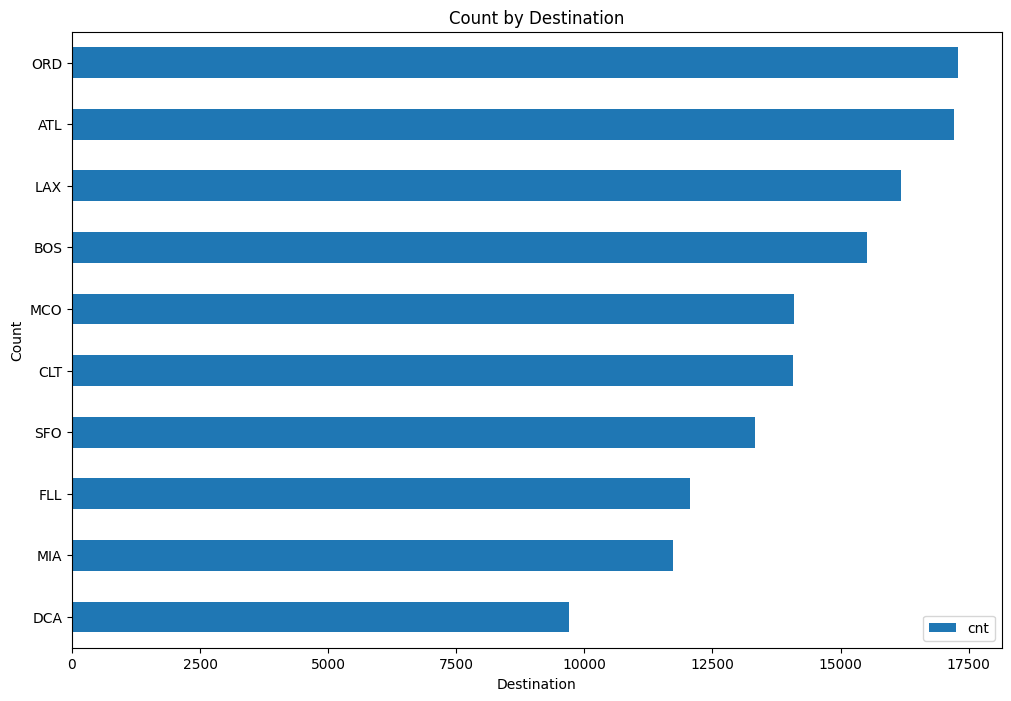

In [ ]:
# plot
dest_cnt_df.head(10).sort_values(by="cnt", ascending=True).plot(
    kind="barh",
    figsize=(12,8),
    x="dest",
    y="cnt",
    title="Count by Destination"
)

plt.xlabel("Destination")
plt.ylabel("Count")
plt.show()

In [27]:
# Most popular destination airport
dest_cnt_df['name'].head(1)

0    Chicago Ohare Intl
Name: name, dtype: object

### Answer
The most popular destination airport is Chicago Ohare Intl

## 2.which month is the busiest of the year?

In [29]:
flights_data.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

In [35]:
month_cnt_df = flights_data.groupby("month").size().reset_index(name="month_cnt").sort_values(by="month_cnt", ascending=True)

month_cnt_df

,month,month_cnt
1,2,24951
0,1,27004
10,11,27268
8,9,27574
11,12,28135
5,6,28243
3,4,28330
4,5,28796
2,3,28834
9,10,28889


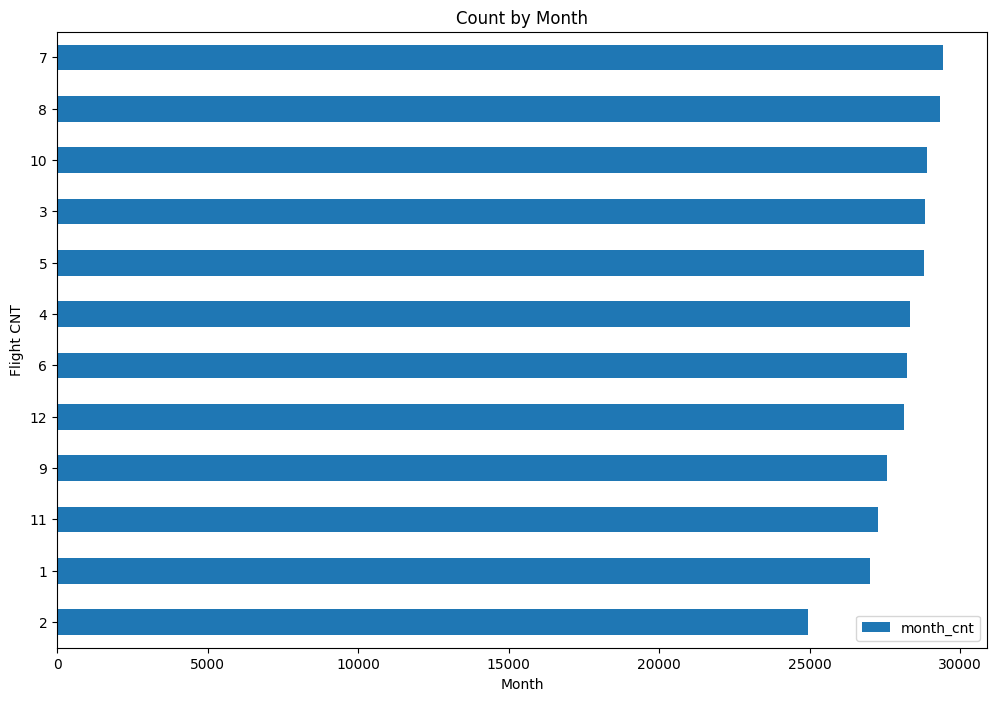

In [36]:
# Plot
month_cnt_df.plot(kind="barh", figsize=(12,8), x="month", y="month_cnt", title="Count by Month")
plt.xlabel("Month")
plt.ylabel("Flight CNT")
plt.show()

### Answer

July is the busiest month of year.

## 3.Which airline is the most punctual?

In [38]:
punctual_df = flights_data.groupby("carrier").agg(
    avg_dep_delay = ("dep_delay", np.mean),
    avg_arr_delay = ("arr_delay", np.mean)
).sort_values("avg_dep_delay", ascending= True)

punctual_df

,avg_dep_delay,avg_arr_delay
carrier,,
US,3.782418,2.129595
HA,4.900585,-6.915205
AS,5.804775,-9.930889
AA,8.586016,0.364291
DL,9.264505,1.644341
MQ,10.552041,10.774733
UA,12.106073,3.558011
OO,12.586207,11.931034
VX,12.869421,1.764464


In [40]:
punctual_airline_df = pd.merge(punctual_df, airlines_data, how="left", left_on="carrier", right_on="carrier")

punctual_airline_df

,carrier,avg_dep_delay,avg_arr_delay,name
0,US,3.782418,2.129595,US Airways Inc.
1,HA,4.900585,-6.915205,Hawaiian Airlines Inc.
2,AS,5.804775,-9.930889,Alaska Airlines Inc.
3,AA,8.586016,0.364291,American Airlines Inc.
4,DL,9.264505,1.644341,Delta Air Lines Inc.
5,MQ,10.552041,10.774733,Envoy Air
6,UA,12.106073,3.558011,United Air Lines Inc.
7,OO,12.586207,11.931034,SkyWest Airlines Inc.
8,VX,12.869421,1.764464,Virgin America
9,B6,13.022522,9.457973,JetBlue Airways


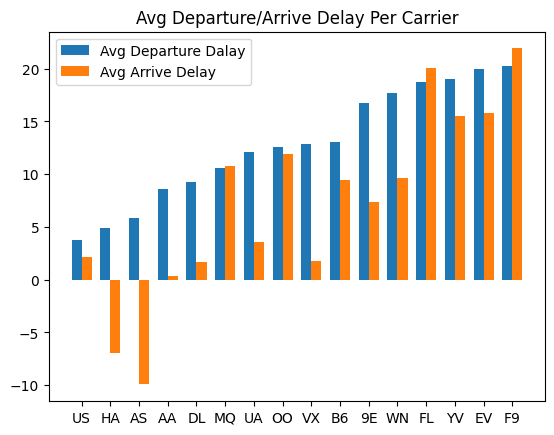

In [42]:
# Plot 
from cProfile import label


plt.Figure(figsize=(12, 8))

# x axis position
x = punctual_airline_df["carrier"]
x_index = range(len(x))

# columns width
width = 0.35

# plot
plt.bar([i - width/2 for i in x_index], punctual_airline_df["avg_dep_delay"], width=width, label="Avg Departure Dalay")
plt.bar([i + width/2 for i in x_index], punctual_airline_df["avg_arr_delay"], width=width, label="Avg Arrive Delay")
plt.xticks(ticks=x_index, labels=x, rotation=0)
plt.title("Avg Departure/Arrive Delay Per Carrier")
plt.legend()
plt.show()


### Answer

From departrue prespective, US(US Airways Inc.) is most punctual carrier.
From arrival prespective, AS(Alaska Airlines Inc.) is most punctual carrier.

## 4.what destination is the longest duration?

In [44]:
dest2 = flights_data.groupby("dest")["air_time"].mean().reset_index(name="avg_duration").sort_values(by="avg_duration", ascending=False)

dest2

,dest,avg_duration
40,HNL,617.447932
3,ANC,413.125000
91,SJC,346.606707
90,SFO,345.683140
66,OAK,344.734628
...,...,...
73,PHL,33.171317
78,PVD,32.667598
2,ALB,31.787081
7,BDL,25.466019


In [72]:
dest2_df = pd.merge(dest2, airports_data, how="left", left_on="dest", right_on="faa")

dest2_df

,dest,avg_duration,faa,name,lat,lon,alt,tz,dst,tzone
0,HNL,617.447932,HNL,Honolulu Intl,21.318681,-157.922428,13.0,-10.0,N,Pacific/Honolulu
1,ANC,413.125000,ANC,Ted Stevens Anchorage Intl,61.174361,-149.996361,152.0,-9.0,A,America/Anchorage
2,SJC,346.606707,SJC,Norman Y Mineta San Jose Intl,37.362600,-121.929022,62.0,-8.0,A,America/Los_Angeles
3,SFO,345.683140,SFO,San Francisco Intl,37.618972,-122.374889,13.0,-8.0,A,America/Los_Angeles
4,OAK,344.734628,OAK,Metropolitan Oakland Intl,37.721278,-122.220722,9.0,-8.0,A,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...
100,PHL,33.171317,PHL,Philadelphia Intl,39.871944,-75.241139,36.0,-5.0,A,America/New_York
101,PVD,32.667598,PVD,Theodore Francis Green State,41.732581,-71.420383,55.0,-5.0,A,America/New_York
102,ALB,31.787081,ALB,Albany Intl,42.748267,-73.801692,285.0,-5.0,A,America/New_York
103,BDL,25.466019,BDL,Bradley Intl,41.938889,-72.683222,173.0,-5.0,A,America/New_York


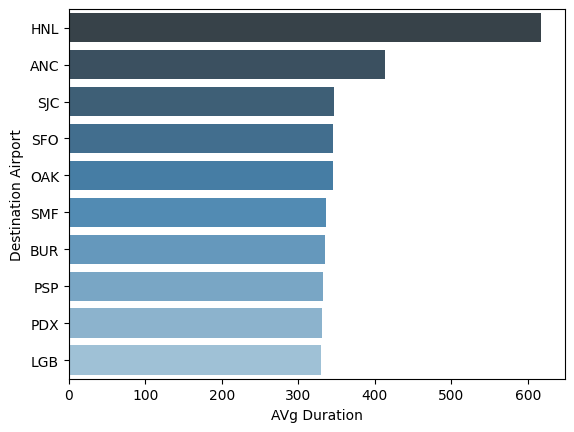

In [ ]:
# plot 
top10 = dest2_df.sort_values(by="avg_duration", ascending=False).head(10)

# Reverse the order, only for matplotlib;
# top10 = top10[::-1]
# top10.plot(kind="barh", x="dest", y="avg_duration", figsize=(12,8), title="Top 10 Average Flight Duration Per Destination")
#Custom the palette
reversed_palette = sns.color_palette("Blues_d", n_colors=10)[::-1]

sns.barplot(
    data=top10,
    x="avg_duration",
    y="dest",
    palette=reversed_palette
)
plt.xlabel("Avg Duration")
plt.ylabel("Destination Airport")
plt.show()

### Answer:
Honolulu Intl has longest duration.

## 5. Which airline has the highest capacity of seats?

In [98]:
capacity_df = pd.merge(flights_data, plane_data, how="left", on="tailnum")

capacity_df = pd.merge(capacity_df, airlines_data, how="left", on="carrier")

capacity_df.columns

Index(['year_x', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'year_y', 'type', 'manufacturer', 'model', 'engines',
       'seats', 'speed', 'engine', 'name'],
      dtype='object')

In [101]:
capacity_airline_df = (
    capacity_df.groupby("name")
    .agg(seat_capacity=("seats", "sum"))
    .reset_index()
    .sort_values(by="seat_capacity", ascending=False)
)

capacity_airline_df

,name,seat_capacity
14,United Air Lines Inc.,10061344.0
3,Delta Air Lines Inc.,8117344.0
9,JetBlue Airways,7212985.0
13,US Airways Inc.,3447794.0
6,ExpressJet Airlines Inc.,3220370.0
2,American Airlines Inc.,1995086.0
12,Southwest Airlines Co.,1724940.0
4,Endeavor Air Inc.,1381080.0
15,Virgin America,919056.0
0,AirTran Airways Corporation,329845.0


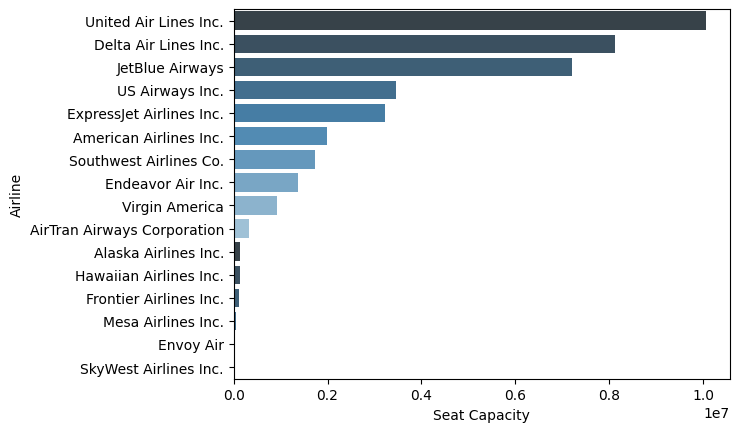

In [103]:
# plot
plt.Figure(figsize=(12, 8))

#Custom the palette
reversed_palette = sns.color_palette("Blues_d", n_colors=10)[::-1]

sns.barplot(
    data=capacity_airline_df,
    x= "seat_capacity",
    y= "name",
    palette=reversed_palette
)

plt.xlabel("Seat Capacity")
plt.ylabel("Airline")
plt.show()

### Answer
United Air Lines Inc. has most sest, which is most capacity airline.

## 6.which airplane model is the highest in use and from which manufacturer?

In [105]:
plane_df = pd.merge(flights_data, plane_data, how="left", on="tailnum")

plane_df.columns

Index(['year_x', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'year_y', 'type', 'manufacturer', 'model', 'engines',
       'seats', 'speed', 'engine'],
      dtype='object')

In [107]:
plane_cnt_df = plane_df.groupby(["manufacturer", "model"]).size().reset_index(name="plane_cnt").sort_values(by="plane_cnt", ascending=False)

plane_cnt_df

,manufacturer,model,plane_cnt
9,AIRBUS,A320-232,31278
119,EMBRAER,EMB-145LR,28027
121,EMBRAER,ERJ 190-100 IGW,23716
23,AIRBUS INDUSTRIE,A320-232,14553
120,EMBRAER,EMB-145XR,14051
...,...,...,...
72,BOEING,757-212,2
14,AIRBUS,A330-323,1
26,AIRBUS INDUSTRIE,A330-223,1
71,BOEING,747-451,1


### Answer
A320-232 is the highest in use airplane model, come from Airbus.